In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

'''import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"import os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [ ]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Dropout
from keras.preprocessing.text import Tokenizer
from keras.initializers import Constant
from keras.optimizers import Adam
from matplotlib import pyplot 

In [ ]:
data=pd.read_excel("/content/8th sem project Ekta diksha.xlsx")
data.head()

,Query,NLP,ML,IOT,Robotics,Web Developments,Operating System,Cloud Computing,Cyber Security,Software Engineering,Salesforce
0,information retrieval in natural language proc...,1,0,0,0,0,0,0,0,0,0
1,information retrieval,1,0,0,0,0,0,0,0,0,0
2,information retrieval systems,1,0,0,0,0,0,0,0,0,0
3,information retrieval and ranking,1,0,0,0,0,0,0,0,0,0
4,information retrieval using machine learning,1,1,0,0,0,0,0,0,0,0


In [ ]:
x=data['Query']
y=data.drop('Query',axis=1)
print(x.shape)
print(y.shape)

(246,)
(246, 10)


In [ ]:
max_words=2000
t=Tokenizer(num_words=max_words)
t.fit_on_texts(x)
x_sequences=t.texts_to_sequences(x)
x_sequences[0]

[2, 3, 1, 16, 17, 10]

In [ ]:
max_length=10
from keras.preprocessing.sequence import pad_sequences
x_pad=pad_sequences(
    x_sequences,maxlen=max_length, padding="post", truncating="post"
    )
print(x_pad[0])

[ 2  3  1 16 17 10  0  0  0  0]


In [ ]:
model=Sequential()

model.add(Embedding(max_words,10,input_length=max_length))
model.add(LSTM(units=10,dropout=0.2))
model.add(Dense(10,activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy","Precision","Recall"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 10)            20000     
_________________________________________________________________
lstm (LSTM)                  (None, 10)                840       
_________________________________________________________________
dense (Dense)                (None, 10)                110       
Total params: 20,950
Trainable params: 20,950
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_pad,y,epochs=10)

Epoch 1/10
8/8 [==============================] - 3s 6ms/step - loss: 0.6924 - accuracy: 0.0998 - precision: 0.0892 - recall: 0.2658
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.1251 - precision: 0.1920 - recall: 0.1242
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6704 - accuracy: 0.1786 - precision: 0.2558 - recall: 0.3019
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6561 - accuracy: 0.1978 - precision: 0.2552 - recall: 0.3508
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6382 - accuracy: 0.2207 - precision: 0.2488 - recall: 0.3705
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6133 - accuracy: 0.2378 - precision: 0.2574 - recall: 0.3955
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.5812 - accuracy: 0.1676 - precision: 0.2363 - recall: 0.3709
Epoch 8/10
8/8 [==============================] - 0s 6ms/step - loss:

In [ ]:
model.save('lstm_model.h1')

INFO:tensorflow:Assets written to: lstm_model.h1/assets


INFO:tensorflow:Assets written to: lstm_model.h1/assets


In [ ]:
from keras.models import load_model
model = load_model('lstm_model.h1')

In [ ]:
import nltk
import string
import re

input_str = input("Enter the string:\n")

#to lower the cases
#input_str=input_str.lower()

#to remove numbers
result=re.sub(r'\d+', '', input_str)
input_str=result

#to remove punctuation
translator = str.maketrans('', '', string.punctuation) 
input_str=input_str.translate(translator)

#to remove white spaces
" ".join(input_str.split())
print(input_str)
input_str1=list(input_str.split(" "))
print(input_str1)

Enter the string:
machine learning
machine learning
['machine', 'learning']


In [ ]:
max_words_new=10
t1=Tokenizer()
t1.fit_on_texts(input_str1)
input_sequences=t1.texts_to_sequences(input_str1)

max_length=10
input_pad=pad_sequences(
    input_sequences,maxlen=max_length, padding="post", truncating="post"
    )
print(input_pad)

[[1 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0]]


In [ ]:
y_predict=model.predict_proba(input_pad)
print(y_predict)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[[0.2527345  0.4679659  0.17750174 0.20253289 0.2482625  0.2849765
  0.22555763 0.12449121 0.4857588  0.16977304]
 [0.25290853 0.4680747  0.17730752 0.20242375 0.24847674 0.2850938
  0.22528455 0.12421757 0.48586568 0.16959918]]


In [ ]:
import numpy as np
labels=np.mean(y_predict,axis=0)
print(labels)
class_labels=[0,0,0,0,0,0,0,0,0,0]
for i in range(0,len(labels)):
    if labels[i]>=0.43:
        class_labels[i]=1
    else:
        class_labels[i]=0
print(class_labels)

[0.2528215  0.46802032 0.17740463 0.20247832 0.24836962 0.28503516
 0.22542109 0.12435439 0.48581225 0.16968611]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0]


In [ ]:
import xlrd 
import operator
loc = ("/content/cluster_output.xlsx") 
  
wb = xlrd.open_workbook(loc) 
sheet = wb.sheet_by_index(0)

def retrieve(n):
  result=dict()
  i=0
  while i<len(input_str1):
    for j in range(0,sheet.nrows):
      if sheet.cell_value(j,n)==1:
        s=sheet.cell_value(j,2)
        arr1=s.split(' ')
        for k in range(0,len(arr1)):
          if(input_str1[i]==arr1[k]):
            if(sheet.cell_value(j,1) in result.keys()):
              result[sheet.cell_value(j,1)]+=1
            else:
              result[sheet.cell_value(j,1)]=1
            break
    i=i+1
  print(result)
  result=sorted(result.items(),key=operator.itemgetter(1),reverse=True)
  print("The ranked document indices are:-")
  for item in result:
    print(item[0])
if class_labels[0]==1:
    n=4
    retrieve(n)
elif class_labels[0]==1:
    n=5
    retrieve(n)
else:
    n=6
    retrieve(n)

{'d8': 1}
The ranked document indices are:-
d8


dict_keys(['loss', 'accuracy', 'precision', 'recall'])


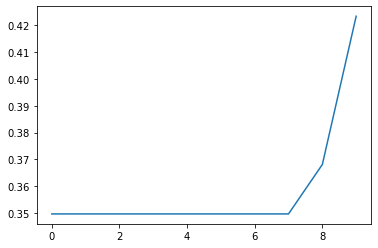

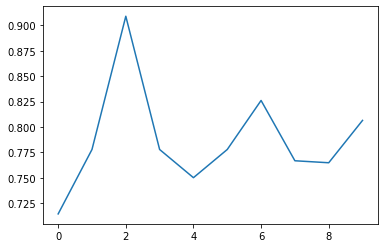

In [ ]:
print(history.history.keys())
pyplot.plot(history.history['accuracy'])
pyplot.show()
pyplot.plot(history.history['precision'])
pyplot.show()
pyplot.plot(history.history['recall'])
pyplot.show()